In [1]:
import torchvision.datasets
from torchvision import datasets, transforms
import torch.utils.data
import matplotlib.pyplot as plt
import torch.nn
import torch.optim
import numpy as np
plt.rcParams.update({'font.size': 15})

/home/mjy/anaconda3/envs/bilinear_network/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libc10_cuda.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
print(torch.__version__)
print(torch.version.cuda)

1.13.1
None


In [3]:
BATCH_SIZE=100
NUM_EPOCHS=100
DEVICE='cuda:0'

In [4]:
transform = transforms.Compose([transforms.ToTensor()])
data_train = datasets.MNIST(root = "./data/",
                            transform=transform,
                            train = True,
                            download = True)

data_test = datasets.MNIST(root="./data/",
                           transform = transform,
                           train = False)

In [5]:
train_dataloader=torch.utils.data.DataLoader(dataset=data_train,batch_size=BATCH_SIZE)
print('The len of train dataset={}'.format(len(data_train)))

test_dataloader=torch.utils.data.DataLoader(dataset=data_test,batch_size=BATCH_SIZE)
print('The len of test dataset={}'.format(len(data_test)))

The len of train dataset=60000
The len of test dataset=10000


In [6]:
for images,labels in train_dataloader:
    print('The images size is {}',format(images.size())) 
    print('The labels size is {}'.format(labels.size())) 
    break #本循环就是执行一次

The images size is {} torch.Size([100, 1, 28, 28])
The labels size is torch.Size([100])


In [7]:
fc=torch.nn.Linear(28*28,10) #只使用一层线性分类器
# fc.to(DEVICE)#如果用CPU去掉

In [8]:
criterion=torch.nn.CrossEntropyLoss()

In [9]:
optimizer=torch.optim.Adam(fc.parameters())


In [10]:
for epoch in range(NUM_EPOCHS):
    for idx, (images,labels) in enumerate(train_dataloader):
        x =images.reshape(-1,28*28)

        # x=x.to(DEVICE)# 如果用CPU去掉
        # labels=labels.to(DEVICE)# 如果用CPU去掉

        optimizer.zero_grad() #梯度清零
        preds=fc(x) #计算预测
        loss=criterion(preds,labels) #计算损失
        loss.backward() # 计算参数梯度
        optimizer.step() # 更新迭代梯度
        if epoch % 10 ==0:
            if idx % 100 ==0:
                print('epoch={}:idx={},loss={:g}'.format(epoch,idx,loss))

epoch=0:idx=0,loss=2.33097
epoch=0:idx=100,loss=0.761485
epoch=0:idx=200,loss=0.692883
epoch=0:idx=300,loss=0.570463
epoch=0:idx=400,loss=0.393721
epoch=0:idx=500,loss=0.442088
epoch=10:idx=0,loss=0.192492
epoch=10:idx=100,loss=0.256619
epoch=10:idx=200,loss=0.252927
epoch=10:idx=300,loss=0.237262


KeyboardInterrupt: 

In [19]:
correct=0
total=0

for idx,(images,labels) in enumerate(test_dataloader):
    x =images.reshape(-1,28*28) #对所有的图片进行reshape size(m,28*28)
    x=x.to(DEVICE)
    labels=labels.to(DEVICE)

    preds=fc(x)
    predicted=torch.argmax(preds,dim=1) #在dim=1中选取max值的索引
    if idx ==0:
        print('x size:{}'.format(x.size()))
        print('preds size:{}'.format(preds.size()))
        print('predicted size:{}'.format(predicted.size()))

    total+=labels.size(0)
    correct+=(predicted == labels).sum().item()
    #print('##########################\nidx:{}\npreds:{}\nactual:{}\n##########################\n'.format(idx,predicted,labels))

accuracy=correct/total
print('{:1%}'.format(accuracy))

x size:torch.Size([100, 784])
preds size:torch.Size([100, 10])
predicted size:torch.Size([100])
92.600000%


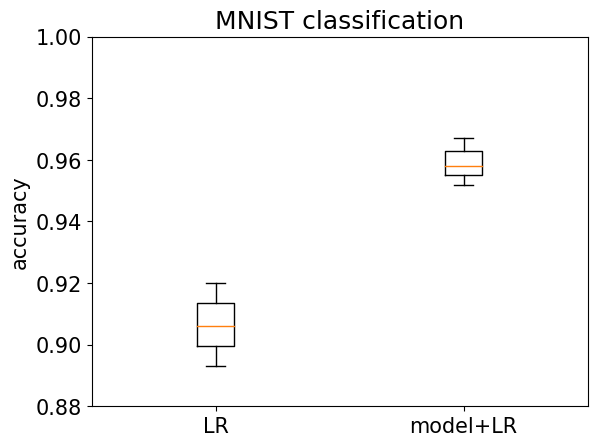

In [4]:
a = np.array([0.906, 0.916, 0.92, 0.9, 0.911, 0.893, 0.899])
b = np.array([0.952, 0.954, 0.965, 0.956, 0.967, 0.958, 0.961])

p = ['LR', 'model+LR']
plt.boxplot([a, b],showfliers=False,labels=p)
plt.ylim(0.88, 1)
plt.ylabel('accuracy')
plt.title('MNIST classification')
plt.savefig('figure/boxplot_MNIST.png',bbox_inches='tight')